# resnet50模型
## 基于模型的数据迁移
###

In [2]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import os

print(os.listdir("D:/Users/JP/Desktop/新建文件夹/chapter_6/input"))
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
import time

from tensorflow import keras

['monkey_labels.txt', 'training', 'validation']


In [5]:
train_dir = "D:Users\JP\Desktop\新建文件夹\chapter_6\input/training/training"
valid_dir = "D:Users\JP\Desktop\新建文件夹\chapter_6\input/validation/validation"
label_file = "D:Users\JP\Desktop\新建文件夹\chapter_6\input/monkey_labels.txt"
print(os.path.exists(train_dir))
print(os.path.exists(valid_dir))
print(os.path.exists(label_file))

print(os.listdir(train_dir))
print(os.listdir(valid_dir))

True
True
True
['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']
['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']


In [6]:
# head 自动读取第一行  自定义行name['','']但是header=None
labels = pd.read_csv(label_file, header=0)
labels

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [7]:
# 调用训练好的模型，其训练图片参数为224*224
height = 224
width = 224
channels = 3
# 数据集内单张图片太大，调小batch_size避免显存不足
batch_size = 24
num_classes = 10
# 图片处理方式
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    # 调用模型，修改
    ############################
    preprocessing_function=keras.applications.resnet50.preprocess_input,
    # preprocess_input做了白化、归一化处理，此处无需对图片进行rescale缩放 否则处理后会造成数据过小
    ############################
    rotation_range=40,  # 旋转角度
    width_shift_range=0.2,  # 水平位移
    height_shift_range=0.2,  # 垂直位移
    shear_range=0.2,  # 剪切
    zoom_range=0.2,  # 缩放
    horizontal_flip=True,  # 水平翻转
    fill_mode='nearest'  # 放大填充方式
)

# 图片读取
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(height, width),  # 图片大小
    batch_size=batch_size,  # 一组图片数量
    seed=7,
    shuffle=True,
    class_mode='categorical'  # 返回标签格式 2d one-hot
)

valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=keras.applications.resnet50.preprocess_input
)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(height, width),
    batch_size=batch_size,
    seed=7,
    shuffle=True,
    class_mode='categorical'
)

train_num = train_generator.samples
valid_num = valid_generator.samples
print(train_num, valid_num)


Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
1098 272


In [8]:
# generator return image-tensor  image-labels
for i in range(2):
    x, y = train_generator.next()
    print(x)
    print('-' * 20)
    # 标签设置了独热码格式
    print(y)

[[[[ 4.37012711e+01  4.37545700e+01 -1.51464386e+01]
   [ 4.44209213e+01  4.43542709e+01 -1.45467377e+01]
   [ 4.51405563e+01  4.49539719e+01 -1.39470291e+01]
   ...
   [-4.26438446e+01 -5.65518112e+01 -7.66800003e+01]
   [-4.18042603e+01 -5.63119316e+01 -7.66800003e+01]
   [-4.09646759e+01 -5.60720482e+01 -7.66800003e+01]]

  [[ 4.91498489e+01  4.82876358e+01 -1.05689468e+01]
   [ 4.96296005e+01  4.86474533e+01 -9.96923828e+00]
   [ 5.01093674e+01  4.90072708e+01 -9.36953735e+00]
   ...
   [-3.78226318e+01 -5.26044464e+01 -7.35054474e+01]
   [-3.73428726e+01 -5.18847961e+01 -7.27857971e+01]
   [-3.68631058e+01 -5.11651535e+01 -7.20661545e+01]]

  [[ 5.28118362e+01  5.10341263e+01 -5.99144745e+00]
   [ 5.32916031e+01  5.15092545e+01 -5.27644348e+00]
   [ 5.37713547e+01  5.21089554e+01 -4.43685913e+00]
   ...
   [-3.46052322e+01 -4.88898163e+01 -6.80124512e+01]
   [-3.42454071e+01 -4.86499329e+01 -6.72928085e+01]
   [-3.38855820e+01 -4.84100571e+01 -6.65731659e+01]]

  ...

  [[-6.49390

In [10]:
resnet50_fine_tune = keras.models.Sequential()

#resnet有1000个分类，我们只有10类，最后一层要去掉，最后的输出是三维矩阵，而不是一维的，
# 我们通过pooling = 'avg'解决这个问题
# pooling size 是（2，2）的时候是大小减半，而pooling size恰好等于图像大小的时候，就可以降维。


# include_top 是否保留顶层的全连接层   ->   取消对输入尺寸限制即224*224   false时，pooling生效为  池化方式
# weight 加载预训练权重即在别人训练好的参数上进行训练
resnet50_fine_tune.add(keras.applications.ResNet50(include_top=False,
                                                   pooling='avg',
                                                   weights='imagenet'))
# 标签独热码，loss采用cate..
resnet50_fine_tune.add(keras.layers.Dense(num_classes,activation='softmax'))
# 第0层参数为预训练参数，且以后训练都保持不变  适合微调
resnet50_fine_tune.layers[0].trainable=False
resnet50_fine_tune.compile(loss='categorical_crossentropy',
                           optimizer='sgd',
                           metrics=['accuracy'])
resnet50_fine_tune.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


In [11]:
epochs = 10
history = resnet50_fine_tune.fit_generator(train_generator,
                                           steps_per_epoch = train_num // batch_size,
                                           epochs = epochs,
                                           validation_data = valid_generator,
                                           validation_steps = valid_num // batch_size)

Epoch 1/10


C:\Users\JP\AppData\Local\Temp\ipykernel_27516\2825544630.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet50_fine_tune.fit_generator(train_generator,


45/45 [==============================] - 18s 313ms/step - loss: 1.0623 - accuracy: 0.6844 - val_loss: 0.3876 - val_accuracy: 0.9508
Epoch 2/10
45/45 [==============================] - 14s 304ms/step - loss: 0.3180 - accuracy: 0.9469 - val_loss: 0.2182 - val_accuracy: 0.9659
Epoch 3/10
45/45 [==============================] - 14s 321ms/step - loss: 0.2140 - accuracy: 0.9572 - val_loss: 0.1693 - val_accuracy: 0.9811
Epoch 4/10
45/45 [==============================] - 14s 316ms/step - loss: 0.1695 - accuracy: 0.9702 - val_loss: 0.1368 - val_accuracy: 0.9735
Epoch 5/10
45/45 [==============================] - 14s 310ms/step - loss: 0.1336 - accuracy: 0.9804 - val_loss: 0.1201 - val_accuracy: 0.9886
Epoch 6/10
45/45 [==============================] - 14s 314ms/step - loss: 0.1235 - accuracy: 0.9777 - val_loss: 0.1160 - val_accuracy: 0.9811
Epoch 7/10
45/45 [==============================] - 14s 312ms/step - loss: 0.1062 - accuracy: 0.9814 - val_loss: 0.0888 - val_accuracy: 0.9848
Epoch 8/10

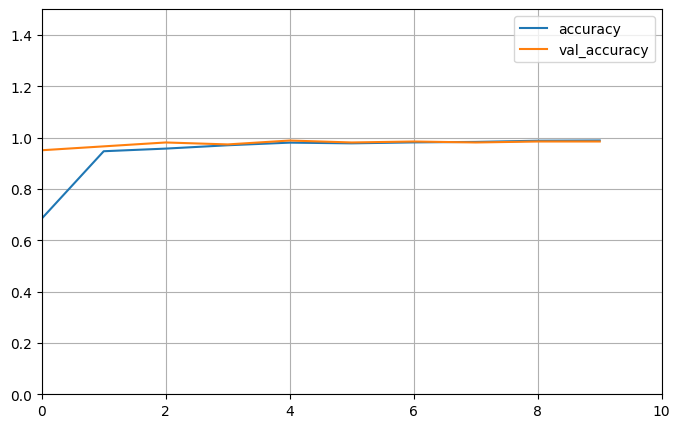

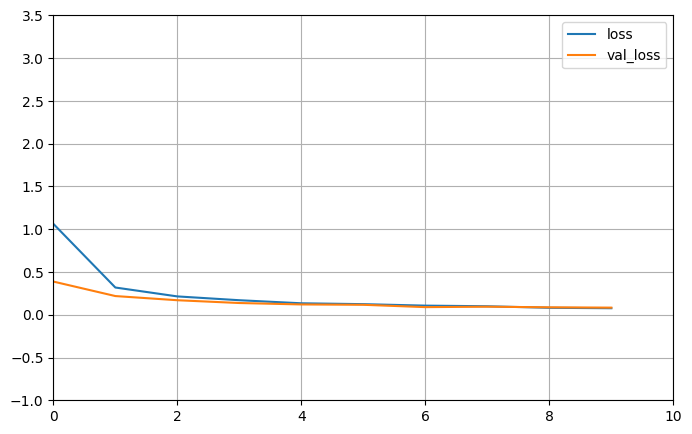

In [12]:
def plot_learning_curves(history, label, epcohs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_' + label] = history.history['val_' + label]
    pd.DataFrame(data).plot(figsize=(8, 5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()


#因为accuracy的值和loss值的范围很不一样，因此我们打印两条曲线
plot_learning_curves(history, 'accuracy', epochs, 0, 1.5)
plot_learning_curves(history, 'loss', epochs, -1, 3.5)

In [ ]:
#另外一种实现
resnet50 = keras.applications.ResNet50(include_top = False,
                                       pooling = 'avg',
                                       weights = 'imagenet')
resnet50.summary()

In [ ]:
#设置只有最后的5层可以训练
for layer in resnet50.layers[0:-5]:
    layer.trainable = False

resnet50_new = keras.models.Sequential([
    resnet50,
    keras.layers.Dense(num_classes, activation = 'softmax'),
])
resnet50_new.compile(loss="categorical_crossentropy",
                     optimizer="sgd", metrics=['accuracy'])
resnet50_new.summary()


In [ ]:
#增加了以后准确率变化了，两个原因，第二个可训练参数变多，2 我们增加的层进行了调整
epochs = 10
history = resnet50_new.fit_generator(train_generator,
                                     steps_per_epoch = train_num // batch_size,
                                     epochs = epochs,
                                     validation_data = valid_generator,
                                     validation_steps = valid_num // batch_size)

In [ ]:
plot_learning_curves(history, 'accuracy', epochs, 0, 1)
plot_learning_curves(history, 'loss', epochs, 0, 2)